   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  
Feature and their types
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species               object
dtype: object


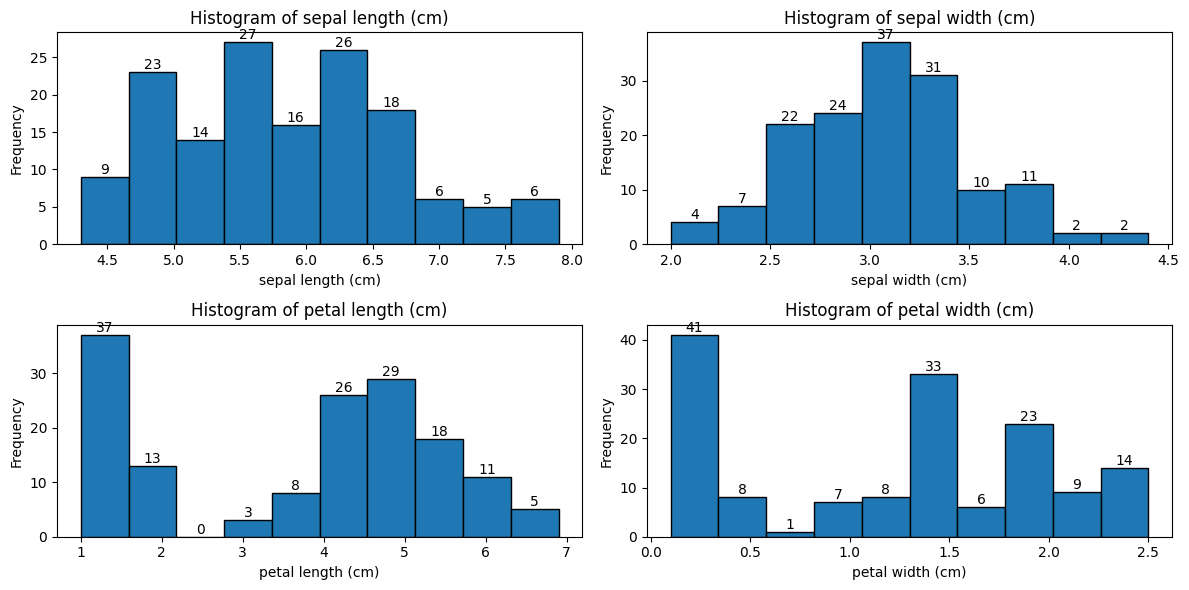

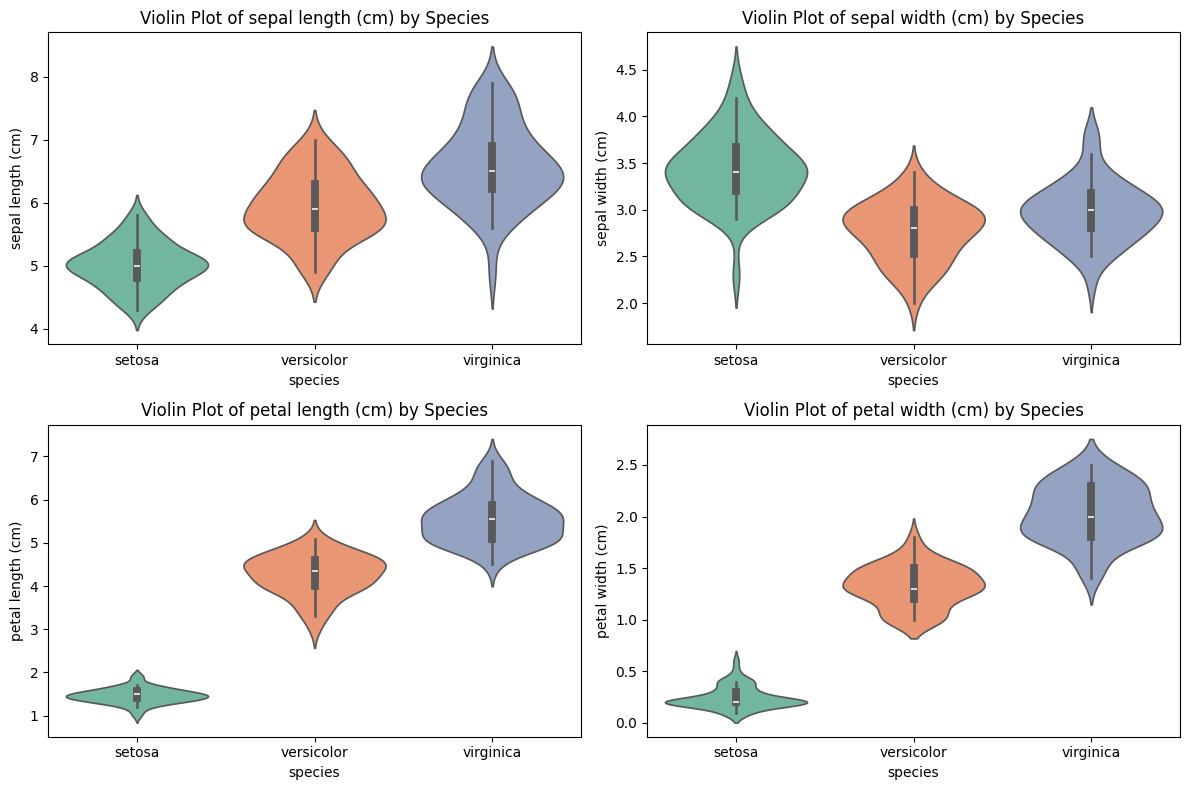


--- Outlier Detection ---
Feature: sepal length (cm)
  Mean: 5.84, Median: 5.80, Std Dev: 0.83
  Outliers: None
----------------------------------------
Feature: sepal width (cm)
  Mean: 3.06, Median: 3.00, Std Dev: 0.44
  Outliers Found: [4.4, 4.1, 4.2, 2.0]
----------------------------------------
Feature: petal length (cm)
  Mean: 3.76, Median: 4.35, Std Dev: 1.77
  Outliers: None
----------------------------------------
Feature: petal width (cm)
  Mean: 1.20, Median: 1.30, Std Dev: 0.76
  Outliers: None
----------------------------------------


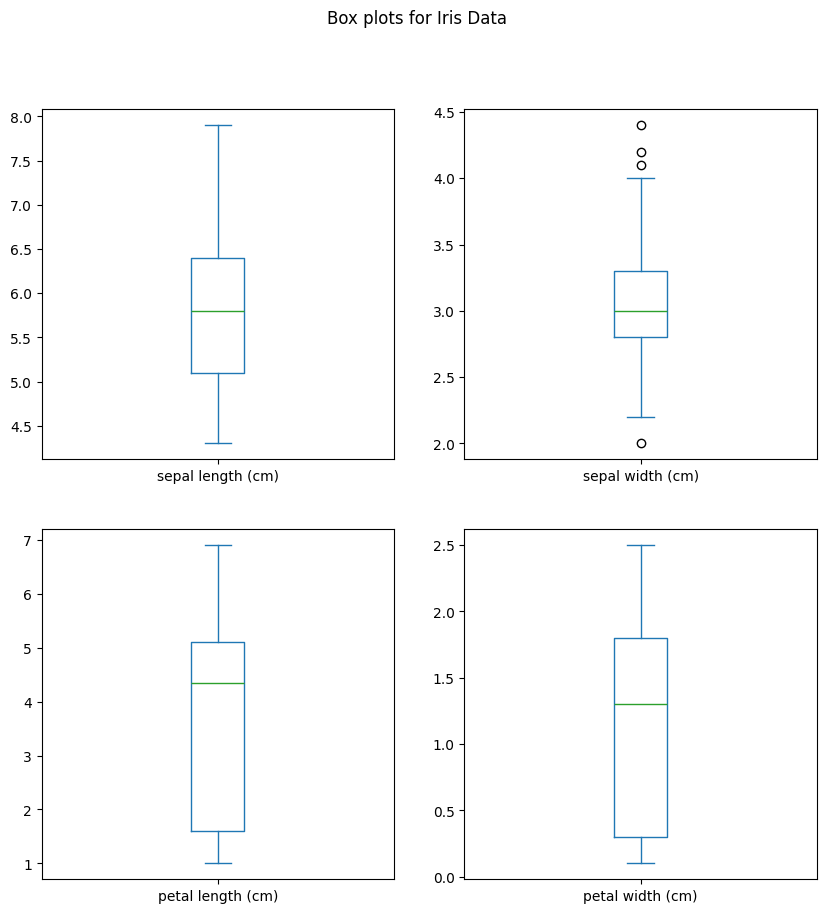

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

# Load Iris dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = [iris.target_names[i] for i in iris.target]
print(df.head())

print("Feature and their types")
print(df.dtypes)
# df['species'] = df['target'].map(lambda x: iris.target_names[x])

# df = df.drop(columns=['target'])


plt.figure(figsize=(12, 6))

for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)

    ax = plt.hist(df[column], edgecolor="black")
    plt.gca().bar_label(plt.gca().containers[0], fmt='%d')  # Add count labels
    plt.title(f"Histogram of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df["species"], y=df[column], palette="Set2", hue=df['species'])
    plt.title(f"Violin Plot of {column} by Species")

plt.tight_layout()
plt.show()

# 2. Outlier Detection using IQR
print("\n--- Outlier Detection ---")
for column in df.columns[:-1]:  # Exclude 'target' column
    Q1, Q3 = df[column].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

    print(f"Feature: {column}")
    print(f"  Mean: {df[column].mean():.2f}, Median: {df[column].median():.2f}, Std Dev: {df[column].std():.2f}")
    if not outliers.empty:
        print(f"  Outliers Found: {outliers.tolist()}")
    else:
        print("  Outliers: None")
    print("-" * 40)

# 3. Box Plots
df.iloc[:, :-1].plot(kind='box', subplots=True, figsize=(10, 10), layout=(2, 2))
plt.suptitle('Box plots for Iris Data')
plt.show()




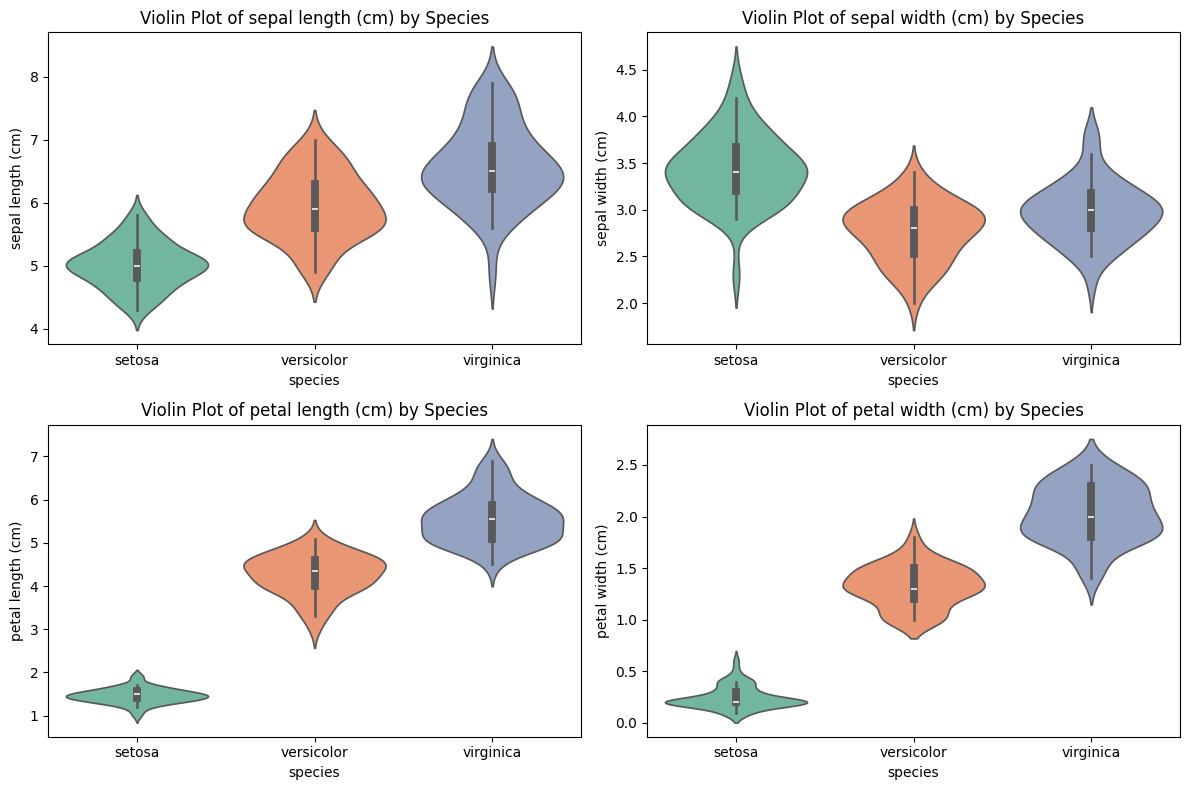

In [29]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(df.columns[:-1]):  # Exclude 'species' column
    plt.subplot(2, 2, i + 1)
    sns.violinplot(x=df["species"], y=df[column], palette="Set2", hue=df['species'])
    plt.title(f"Violin Plot of {column} by Species")

plt.tight_layout()
plt.show()